In [49]:
import nrlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]

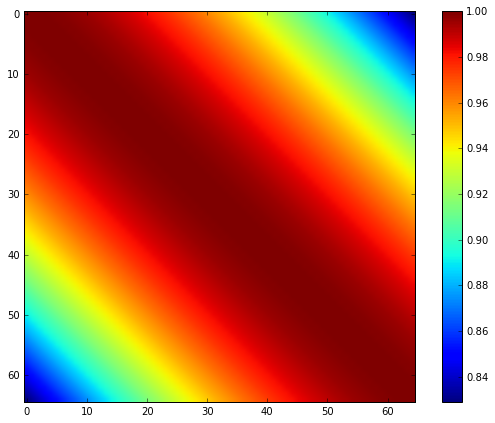

In [114]:
v = nrlib.variogram('gaussian', 1.0, power=1.999)
L = 0.5
X = np.linspace(0, L/2, 65)
c_list = [v.corr(L/2 - x) for x in X]
c = np.array(c_list)
c_flat = np.array([v.corr(x) for x in X])

s_pre = np.outer(np.ones((c_flat.size,)), c_flat)

for i in range(s_pre.shape[0]):
    s_pre[i] = np.roll(s_pre[i], i)
    s_pre[i, :i] = 0
s = s_pre + s_pre.T - np.diag(np.diag(s_pre))

plt.imshow(s)
plt.colorbar()

Smallest eigvalue: -9.399199234880251e-16
Largest eigvalue : 62.99570757820722


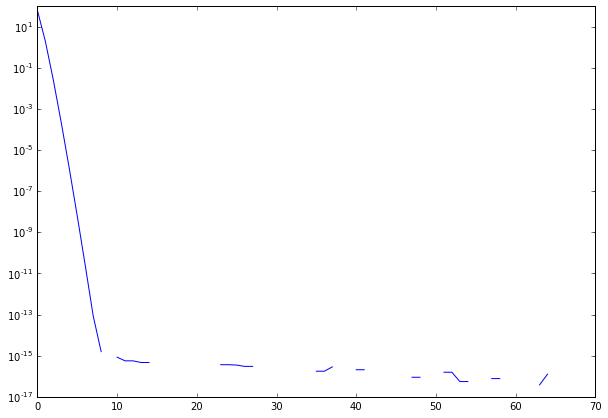

In [115]:
eigs = np.linalg.eig(s)[0]
reigs = np.real(eigs)
ieigs = np.imag(eigs)

assert np.max(np.abs(ieigs)) < 1e-14  # Just to be sure

print("Smallest eigvalue: {}".format(np.min(reigs)))
print("Largest eigvalue : {}".format(np.max(reigs)))


plt.semilogy(reigs)

In [88]:
L = np.linalg.cholesky(s)
plt.imshow(L, interpolation='None', cmap=plt.cm.hot_r)
plt.colorbar()

LinAlgError: Matrix is not positive definite

# Alternative matrix decomposition

Relevant mostly for the Gaussian variogram

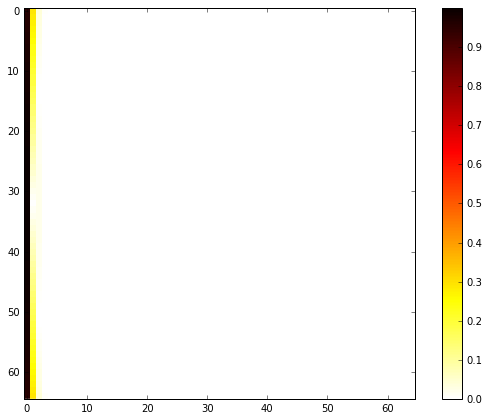

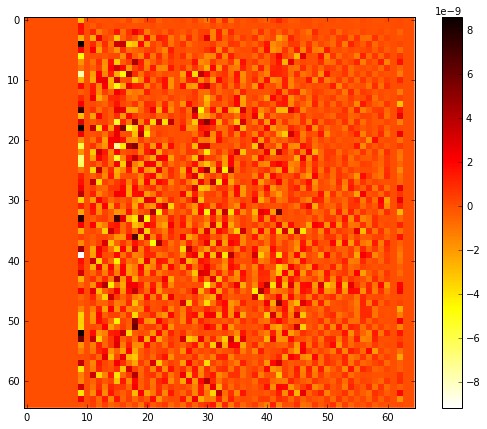

In [116]:
lambd, v = np.linalg.eig(s)
L = v * np.sqrt(lambd)
plt.imshow(np.abs(np.real(L)), interpolation='None', cmap=plt.cm.hot_r)
plt.colorbar()
plt.show()
plt.imshow(np.imag(L), interpolation='None', cmap=plt.cm.hot_r)
plt.colorbar()

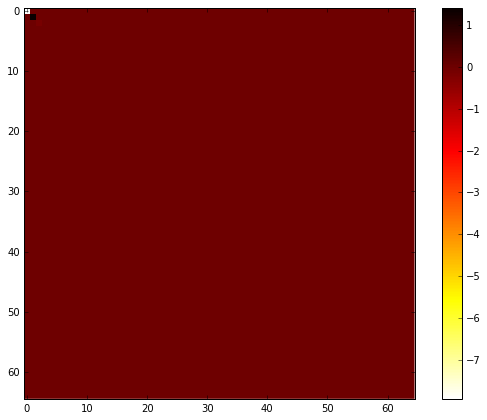

In [117]:
q, r = np.linalg.qr(np.real(L))
plt.imshow(r, interpolation='None', cmap=plt.cm.hot_r)
plt.colorbar()

# Factorization-based simulation

In [118]:
z = np.dot(np.real(L), np.random.normal(size=X.shape))

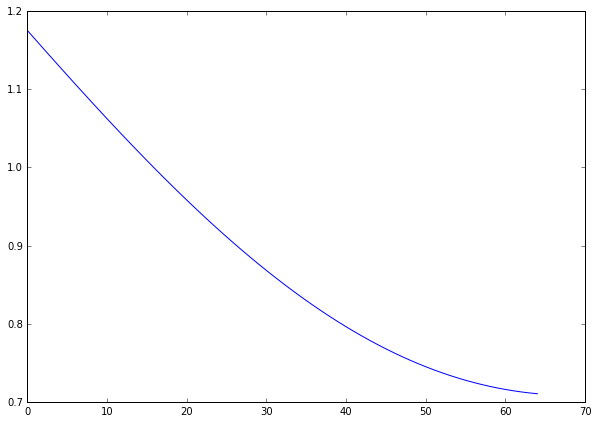

In [119]:
plt.plot(z)
